# 200436-2

In [2]:
from copy import deepcopy
from io import StringIO
from math import *
from pathlib import Path
import re
import sys

In [3]:
from IPython.display import Image

In [4]:
exec((Path.home() / "source/repos/py/startup.py").read_text())
exec((Path.home() / "OneDrive/Documents/GitHub/gcv-lab/gc/startup.py").read_text())

hello world
G91 ;relative


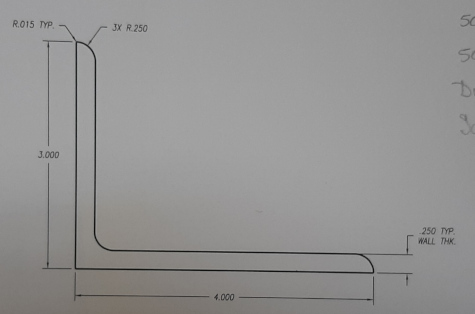

In [6]:
Image('200436-2.jpg')

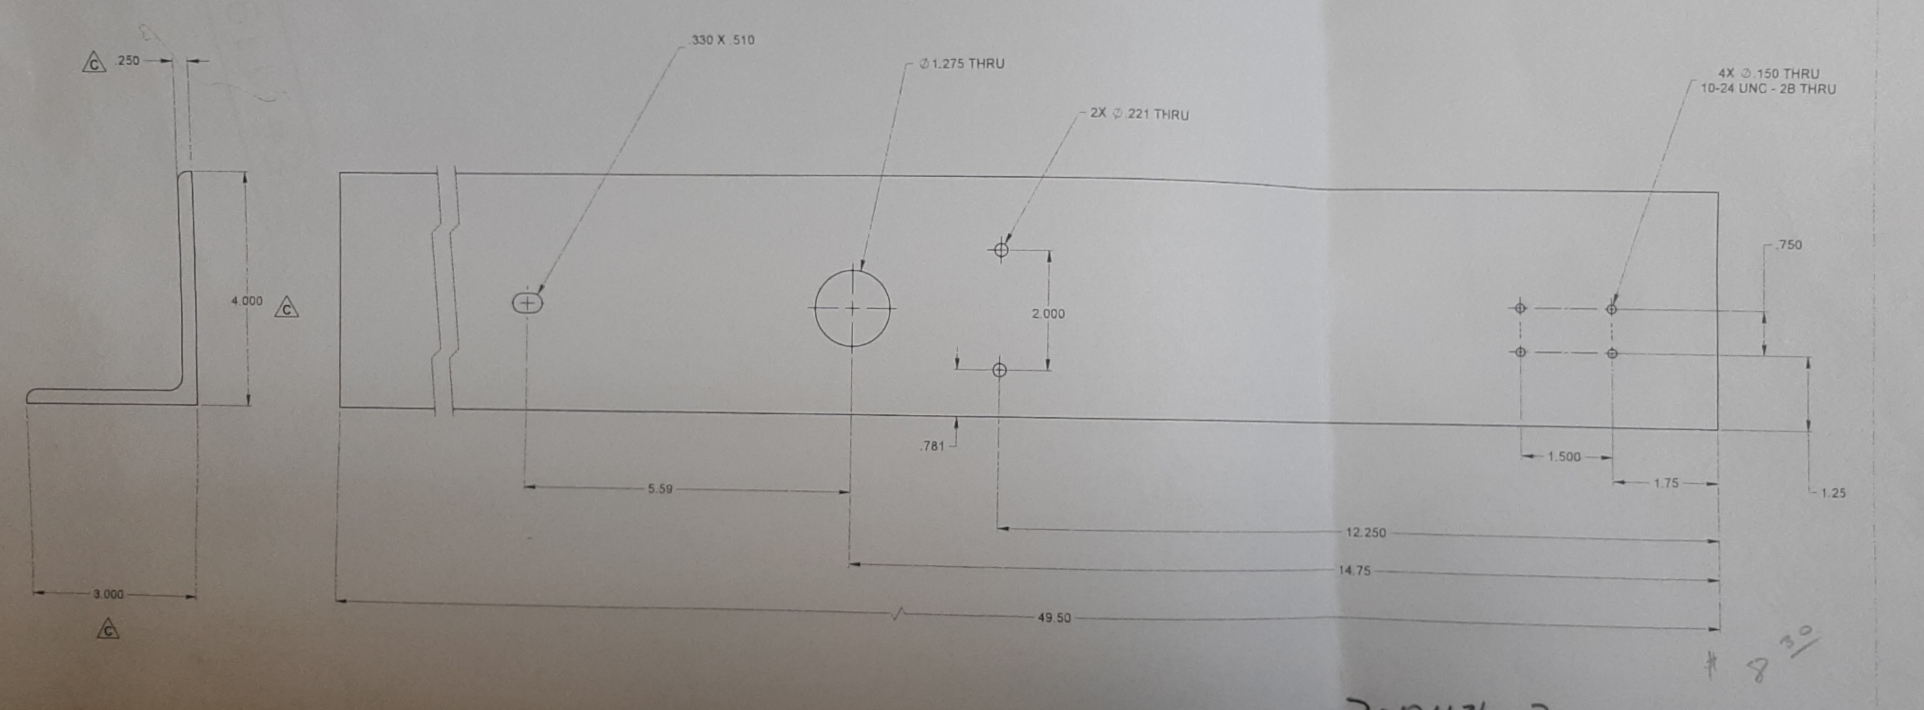

In [7]:
Image('200436-2.plan.jpg')

In [8]:
# Image('200436-2.png')

In [11]:
P = [[-1.75, 2.0, 0.0]]
d = [-1.5, -0.75, 0.0]
M_x = np.array([1.0, 0.0, 0.0])
M_y = np.array([0.0, 1.0, 0.0])
P.append((M_y*d+P[0]).tolist())
Q = P
Q.reverse()
P.extend([(M_x*d+p).tolist() for p in Q])
C_y = 4 - 2.22
P = [P, [[-12.25, 0.781, 0.0]]]
P[1].append([P[1][0][0], P[1][0][1]+2.0, 0.0])
P.append([[-14.75, C_y, 0.0]])
M = M_x - M_y
Q = list()
for pts in P:
    qs = list()
    for p in pts:
        q = (M*p).tolist()
        qs.append(q)
    Q.append(qs)
P = Q
C = [-20.34, C_y, 0.0]

In [12]:
pp(P)

[[[-1.75, -1.25, 0.0],
  [-1.75, -2.0, 0.0],
  [-3.25, -1.25, 0.0],
  [-3.25, -2.0, 0.0]],
 [[-12.25, -0.781, 0.0], [-12.25, -2.781, 0.0]],
 [[-14.75, -1.7799999999999998, 0.0]]]


In [10]:
print(SAFETY_LINE)

G90 G80 G40 G17 G00


In [11]:
print(tool(0.15))

G91 G30 Z0.0 Y0.0 ;
T1 M6 ;
S3820 F57.3 M3 ;




In [13]:
print(drilling_cycle(P[0]))

G99 G81 X-1.75 Y-1.25 R0.2
Y-2.0 
X-3.25 Y-1.25 
Y-2.0 



In [14]:
print(drilling_cycle(P[1]))

G99 G81 X-12.25 Y-0.781 R0.2
Y-2.781 



In [15]:
print(drilling_cycle(P[2]))

G99 G81 X-14.75 Y-1.78 R0.2



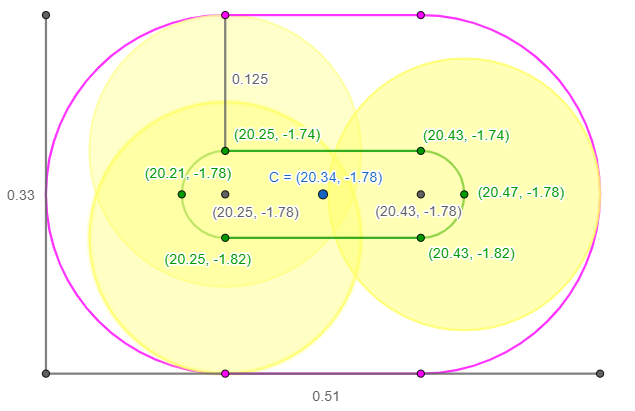

In [15]:
Image('200435-11.slot.png')

In [16]:
columns = ["Degrees", "x", "y"]
c = (-20.34, -1.78)
r = 0.04
w = 0.09
c1 = (c[0]-w, c[1])
df = pd.DataFrame(columns=columns)
for a in range(90, 285, 15):
    attrs = [a, round(c1[0] + r*cos(radians(a)), 4), round(c1[1] + r*sin(radians(a)), 4)]
    df = df.append(dict(zip(columns, attrs)), ignore_index=True)

In [17]:
df

,Degrees,x,y
0,90.0,-20.4300,-1.7400
1,105.0,-20.4404,-1.7414
2,120.0,-20.4500,-1.7454
3,135.0,-20.4583,-1.7517
4,150.0,-20.4646,-1.7600
5,165.0,-20.4686,-1.7696
6,180.0,-20.4700,-1.7800
7,195.0,-20.4686,-1.7904
8,210.0,-20.4646,-1.8000
9,225.0,-20.4583,-1.8083


In [18]:
c2 = (c[0]+w, c[1])
df2 = pd.DataFrame(columns=columns)
for a in range(270, 360, 15):
    attrs = [a, round(c2[0] + r*cos(radians(a)), 4), round(c2[1] + r*sin(radians(a)), 4)]
    df2 = df2.append(dict(zip(columns, attrs)), ignore_index=True)
for a in range(0, 105, 15):
    attrs = [a, round(c2[0] + r*cos(radians(a)), 4), round(c2[1] + r*sin(radians(a)), 4)]
    df2 = df2.append(dict(zip(columns, attrs)), ignore_index=True)

In [19]:
df2

,Degrees,x,y
0,270.0,-20.2500,-1.8200
1,285.0,-20.2396,-1.8186
2,300.0,-20.2300,-1.8146
3,315.0,-20.2217,-1.8083
4,330.0,-20.2154,-1.8000
5,345.0,-20.2114,-1.7904
6,0.0,-20.2100,-1.7800
7,15.0,-20.2114,-1.7696
8,30.0,-20.2154,-1.7600
9,45.0,-20.2217,-1.7517


$ x^2 + y^2 = z^2 \\
   y^2 = z^2 - x^2 \\
   y = \sqrt{z^2 - x^2}
$

In [59]:
z = .2
d = 0.15
depth = 0.25
r = d / 2
depth + sqrt(z**2-r**2)

0.4354049621773916